In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Sampleo exponencial en Python

In [7]:
# Función para sampleo de exponencial
def samplear_transformada_inversa_exp(lam, cantidad):
    
    # Sampleo de v.a. uniforme.
    u = np.random.uniform(0, 1, cantidad)
    
    # Retornar sampleo de v.a. exponencial.
    return -(1 / lam) * np.log(u)

## Sampleo de fallas de máquina

In [36]:
# Sampleo de exponencial
cantidad = 15000
t = samplear_transformada_inversa_exp(5, cantidad)

In [23]:
# Tiempo acumulado.
t_cumsum = t.cumsum()

Text(0, 0.5, 'Cantidad de fallas')

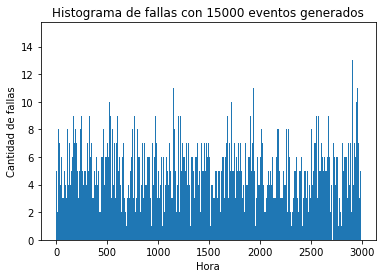

In [24]:
# Histograma de eventos.
bins = plt.hist(t_cumsum, bins=range(0, int(max(t_cumsum))))
plt.title(f"Histograma de fallas con {cantidad} eventos generados")
plt.xlabel("Hora")
plt.ylabel("Cantidad de fallas")

In [25]:
print(f'Media de la muestra: {sum(bins[0]) / len(bins[0]):.2f}')

Media de la muestra: 5.02


In [26]:
# plt.subplots(figsize=(20, 2))
# plt.stem(t_cumsum, [1]*len(t_cumsum))
# plt.ylim([0, 2])
# for x in t_cumsum:
#     plt.annotate(f'{x:.2f}', xy=(x,1), xytext=(0,5), textcoords='offset points', ha='center', rotation=90)
# plt.xlabel('Tiempo (horas)')
# plt.yticks([])

Text(0, 0.5, 'Cantidad')

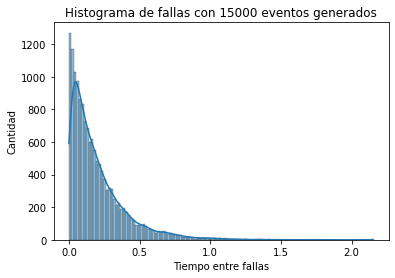

In [37]:
# Histograma de funcion exponencial
sns.histplot(t, kde=True)
plt.title(f"Histograma de fallas con {cantidad} eventos generados")
plt.xlabel("Tiempo entre fallas")
plt.ylabel("Cantidad")

## Sampleo de arribos y despachos

In [39]:
# Sampleo de exponencial
tarr = samplear_transformada_inversa_exp(6, 8)
tdes = samplear_transformada_inversa_exp(7, 8)

print(f'arribos {tarr}')
print(f'despachos {tdes}')

arribos [0.18023166 0.06067138 0.10819257 0.106182   0.11964683 0.29862579
 0.30604711 0.07982644]
despachos [0.19269643 0.03393245 0.08754228 0.00427387 0.02698895 0.02254521
 0.19163272 0.02154844]


In [46]:
# Tiempo acumulado.
tarr_cumsum = tarr.cumsum()
tdes_cumsum = tdes.cumsum()

print(f'Cronómetro arribos {tarr_cumsum}')
print(f'Cronómetro despachos {tdes_cumsum}')

Cronómetro arribos [0.18023166 0.24090304 0.34909561 0.45527762 0.57492445 0.87355024
 1.17959735 1.25942379]
Cronómetro despachos [0.19269643 0.22662888 0.31417117 0.31844504 0.34543399 0.36797921
 0.55961192 0.58116037]


In [49]:
# Ambas simulaciones en una sola tabla.
ev_arr = {'tipo': ['arribo'] * len(tarr), 't_entre_eventos': tarr, 'cronómetro': tarr_cumsum}
ev_des = {'tipo': ['despacho'] * len(tdes), 't_entre_eventos': tdes, 'cronómetro': tdes_cumsum}

# Generamos data frames.
df_arr = pd.DataFrame(ev_arr)
df_des = pd.DataFrame(ev_des)

# Concatenamos
df = pd.concat([df_arr, df_des])

# Ordenamos eventos
df = df.sort_values(by='cronómetro')

print(df)

       tipo  t_entre_eventos  cronómetro
0    arribo         0.180232    0.180232
0  despacho         0.192696    0.192696
1  despacho         0.033932    0.226629
1    arribo         0.060671    0.240903
2  despacho         0.087542    0.314171
3  despacho         0.004274    0.318445
4  despacho         0.026989    0.345434
2    arribo         0.108193    0.349096
5  despacho         0.022545    0.367979
3    arribo         0.106182    0.455278
6  despacho         0.191633    0.559612
4    arribo         0.119647    0.574924
7  despacho         0.021548    0.581160
5    arribo         0.298626    0.873550
6    arribo         0.306047    1.179597
7    arribo         0.079826    1.259424
